# Linear Regression with multiple features

### Load data

In [412]:
import pandas as pd
import numpy as np

data = pd.read_csv('./Dataset.csv')
data.head()

,Feature1,Feature2,Target
0,0.548814,0.715189,4.551265
1,0.602763,0.544883,3.395123
2,0.423655,0.645894,3.906712
3,0.437587,0.891773,5.151037
4,0.963663,0.383442,3.505067


### Data Plotting

Text(0.5, 0, 'Target')

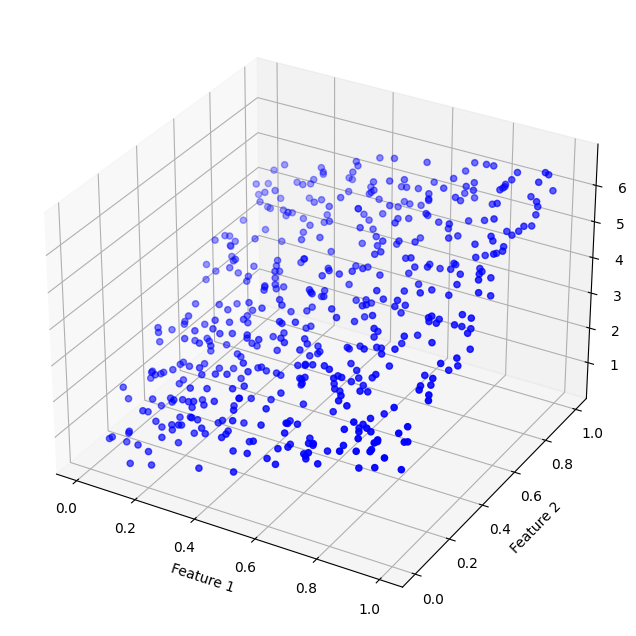

In [413]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Extract feature1, feature2, and target values for plotting
feature1 = data['Feature1']
feature2 = data['Feature2']
target = data['Target']

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the dataset
ax.scatter(feature1, feature2, target, c='b', marker='o')

# Set labels and title
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Target')


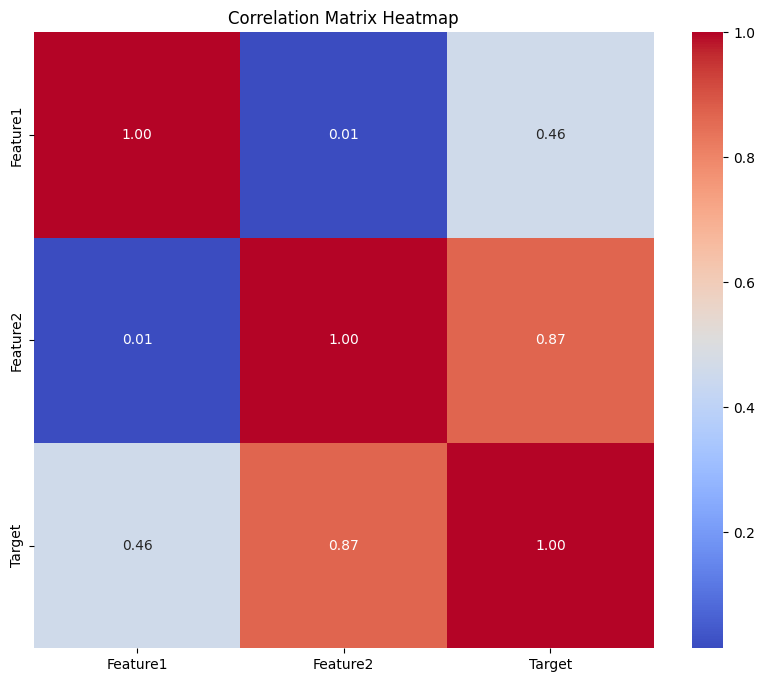

In [414]:
import seaborn as sns
corr_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

### Data Split

In [415]:
X_value = np.array(data[['Feature1', 'Feature2']])
y_value = np.array(data[['Target']])

SplitRatio = 0.7

X_train = X_value[:int(len(X_value) * SplitRatio)]
y_train = y_value[:int(len(y_value) * SplitRatio)]

X_test = X_value[int(len(X_value) * SplitRatio):]
y_test = y_value[int(len(y_value) * SplitRatio):]

print(X_train[0], y_train[0])
print(X_test[0], y_test[0])
print(X_train.shape, y_train.shape)

[0.5488135  0.71518937] [4.55126474]
[0.37321596 0.22286382] [1.93377916]
(350, 2) (350, 1)


### Linear Regression Module

In [416]:
import numpy as np

class LinearRegression:
    def __init__(self, size_variable):
        self.learning_rate = 0.001
        self.W = np.ones((size_variable, 1)) 
        self.b = 0.01 
        
    def compute_cost(self, X, y):
        m = len(y)
        predictions = X.dot(self.W) + self.b  
        cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
        return cost

    def gradient_descent(self, X, y, epochs=10):
        cost_history = []
        m = len(y)
        for epoch in range(epochs):
            prediction = X.dot(self.W) + self.b  
            dW = (1 / m) * X.T.dot(prediction - y) 
            db = (1 / m) * np.sum(prediction - y)  
            
            self.W -= self.learning_rate * dW
            self.b -= self.learning_rate * db
            
            current_cost = self.compute_cost(X, y)
            cost_history.append(current_cost)
            
            if epoch % 1000 == 0:
                print(f"Epoch {epoch}: Cost = {current_cost}")
                
        return cost_history


### Train Model

In [417]:
algorithm = LinearRegression(len(X_train[0]))
cost_result = algorithm.gradient_descent(X_train, y_train, 10000)

Epoch 0: Cost = 3.5417342498727935
Epoch 1000: Cost = 0.37485021911033933
Epoch 2000: Cost = 0.20287578049712204
Epoch 3000: Cost = 0.17625805120543808
Epoch 4000: Cost = 0.1590591417540747
Epoch 5000: Cost = 0.1444604861839352
Epoch 6000: Cost = 0.13183579818230873
Epoch 7000: Cost = 0.12089703434887558
Epoch 8000: Cost = 0.11140948315214683
Epoch 9000: Cost = 0.10317270253835807


### Plotting Result

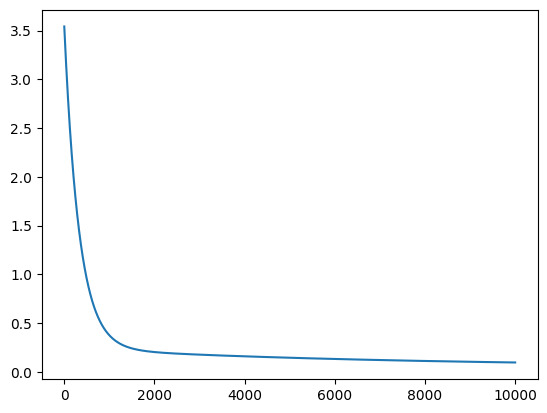

In [418]:
import matplotlib.pyplot as plt
plt.plot(cost_result)